<a href="https://colab.research.google.com/github/ManishSuhas0026/MachineLearning/blob/main/ML_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import\
accuracy_score, precision_score, recall_score, f1_score,\
roc_curve, PrecisionRecallDisplay, classification_report
from sklearn.svm import SVC as svc
import seaborn as sb
import random

In [34]:
path = '/content/drive/MyDrive/archive (2)/Training'

In [35]:
X = []
Y = []
Ages = {'no_tumor': [], 'pituitary_tumor': []}
min_age = 18
max_age = 90
classes = {'pituitary_tumor': 0, 'no_tumor': 1}
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])
        age = random.randint(min_age, max_age)
        Ages[cls].append(age)

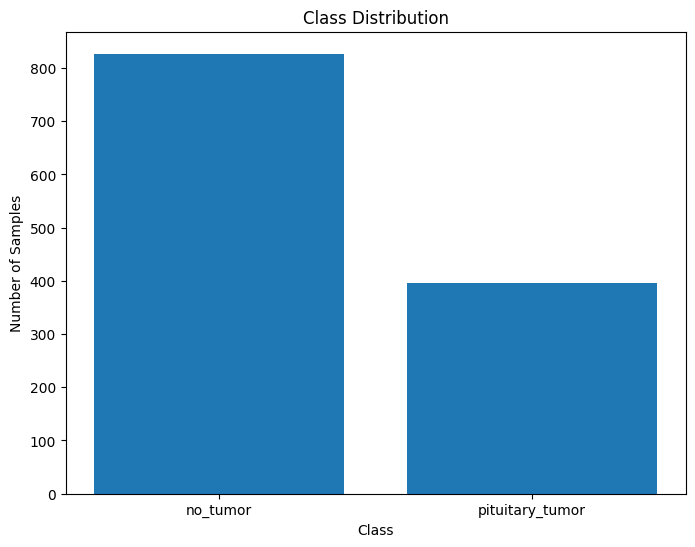

In [38]:
X = np.array(X)
Y = np.array(Y)

# Plot class distribution
plt.figure(figsize=(8, 6))
plt.hist(Y, bins=[0, 1, 2], rwidth=0.8, align='left')
plt.xticks([0, 1], ['no_tumor', 'pituitary_tumor'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

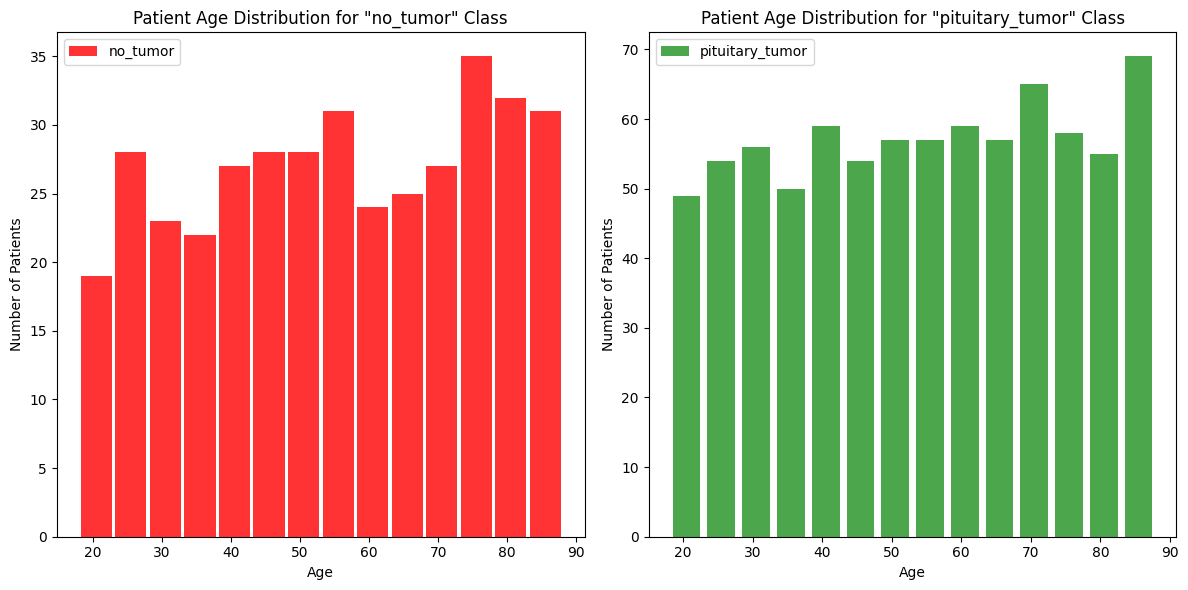

In [39]:
Ages['no_tumor'] = np.array(Ages['no_tumor'])
Ages['pituitary_tumor'] = np.array(Ages['pituitary_tumor'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for "no_tumor" class
ax1.hist(Ages['no_tumor'], bins=np.arange(min_age, max_age+1, 5), rwidth=0.9, color='red', alpha=0.8, label='no_tumor')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Patient Age Distribution for "no_tumor" Class')
ax1.legend()

# Plot for pituitary_tumor" class
ax2.hist(Ages['pituitary_tumor'], bins=np.arange(min_age, max_age+1, 5), rwidth=0.8, color='green', alpha=0.7, label='pituitary_tumor')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Patients')
ax2.set_title('Patient Age Distribution for "pituitary_tumor" Class')
ax2.legend()

plt.tight_layout()
plt.show()


In [40]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

classes = {'no_tumor': 1, 'pituitary_tumor': 0}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)

X = X.reshape(X.shape + (1,))


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

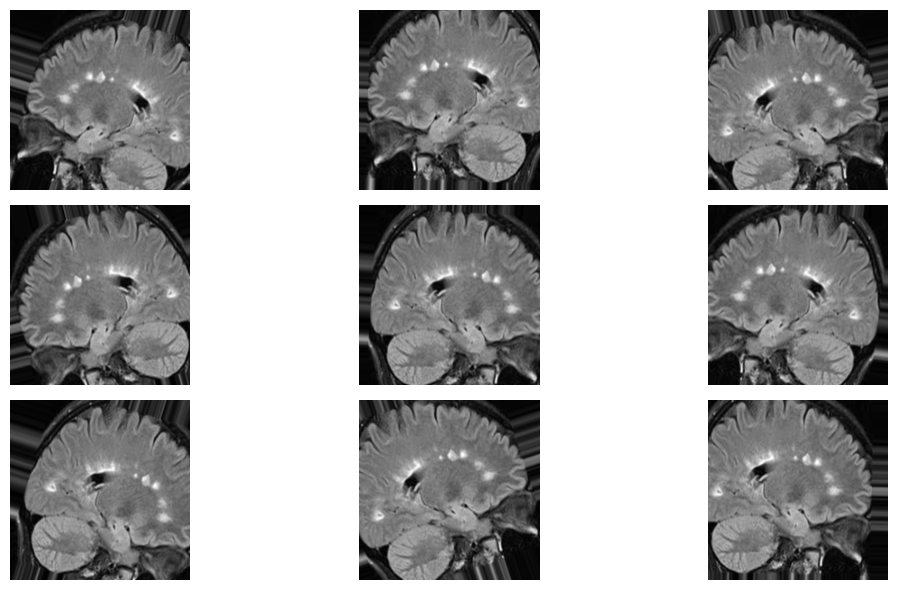

In [43]:

plt.figure(figsize=(12, 6))
for i in range(9):
    augmented_image = datagen.random_transform(X[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[:, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       162
           1       0.97      0.86      0.91        83

    accuracy                           0.94       245
   macro avg       0.95      0.92      0.93       245
weighted avg       0.94      0.94      0.94       245



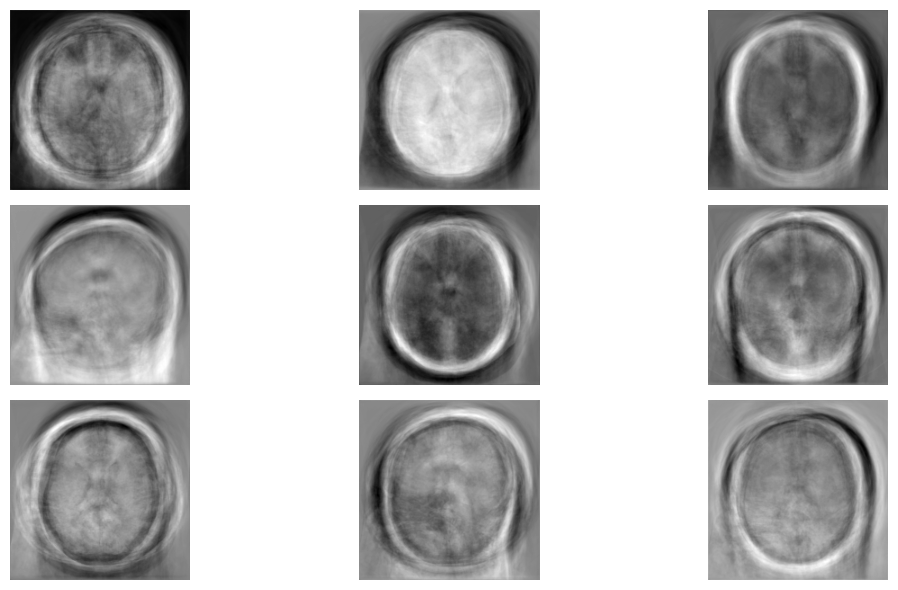

In [44]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_flat = X.reshape(X.shape[0], -1)


n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_flat)
X_pca = pca.transform(X_flat)


X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)


classifier = svm.SVC(kernel='linear', C=0.1)
classifier.fit(X_train, Y_train)


Y_pred = classifier.predict(X_test)


print("Classification Report:\n", metrics.classification_report(Y_test, Y_pred))


plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(pca.components_[i].reshape(200, 200), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9428571428571428
Precision: 0.9726027397260274
Recall: 0.8554216867469879
F1 Score: 0.9102564102564102
ROC AUC Score: 0.9215380038673211


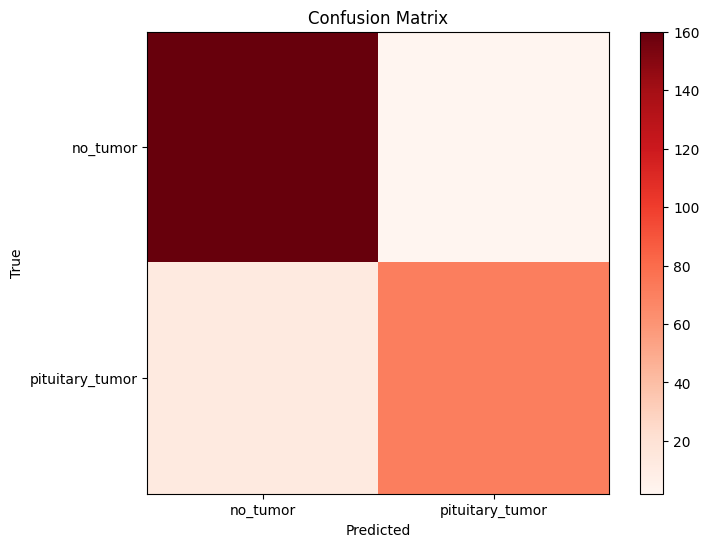

In [46]:
confusion = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(confusion, cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], classes.keys())
plt.yticks([0, 1], classes.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
}
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_


best_svm = svm.SVC(**best_params)
best_svm.fit(X_train, Y_train)


Y_pred = best_svm.predict(X_test)


accuracy = metrics.accuracy_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
f1 = metrics.f1_score(Y_test, Y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.963265306122449
Precision: 0.9512195121951219
Recall: 0.9397590361445783
F1 Score: 0.9454545454545454
